## 한글 워드클라우드 - 추석 선물

In [1]:
import re, nltk
from konlpy.tag import Okt 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 텍스트 전처리

In [2]:
with open('data/추석선물.txt') as file:
    text = file.read()

In [3]:
okt = Okt()
tokens = okt.nouns(text)        # 문장에서 명사 추출
tokens[:10]

['부모님', '추석', '선물', '것', '선물', '라면', '부모님', '선호', '제품', '선물']

In [4]:
# 영문자, 숫자, 구둣점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)
    if item:        # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 과정을 만족할때까지 반복

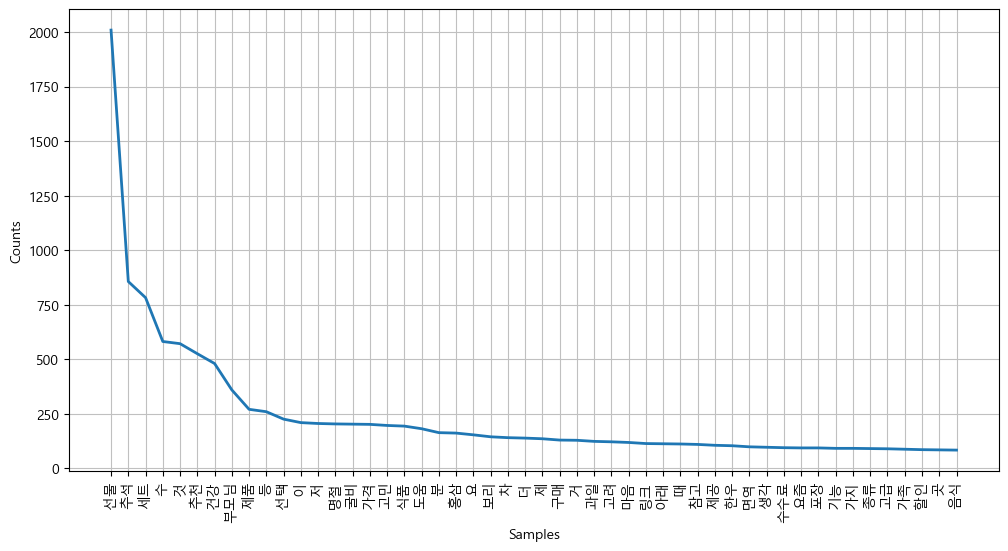

In [5]:
gift = nltk.Text(new_tokens, name='추석 선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [6]:
stoptext = """
    선물 추석 세트 수 것 추천 부모님 제품 등 선택 이 저 명절 가격 고민 도움 분 요 제 더 구매 거 링크
    아래 고려 때 참고 마음 제공 생각 수수료 포장 기능 요즘 종류 고급 가지 선생님 답변 할인 맛 활동
    사람 곳 음식 쿠팡 상품 가족 준비 이번 하나 스 용 부담 질문 파트너 예 위 가장 여기 사용 전 저희
    성분 회복 포함 때문 일환 자주 제일 관리 좀 경우 정액 어르신 확인 포스팅 해 중 브랜드 판매 보시
    아이디어 센스 취향 크기 인기 당뇨 아성 겉 효과 주문 직원 혈액 운동 정말 이벤트 용품 순환 임금님
    사이트 시간 일 위해 피로 기 직접 드릴 어른 다른 채택 품질 바로 정리 회사 라면 집 개선 최고 지급
    자 백화점 가성 실용 한번 구성 더욱 예약
"""
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['선호', '선호', '테크', '안마', '의자', '안마', '의자', '테크', '음파', '진동']

- 워드 클라우드 그리기

In [7]:
gift.vocab().most_common(5)

[('선물', 2009), ('추석', 856), ('세트', 782), ('수', 581), ('것', 571)]

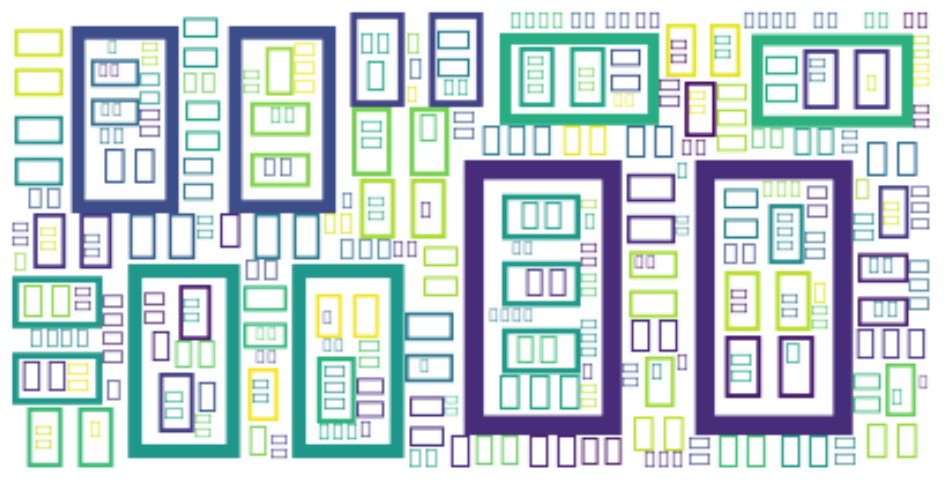

In [8]:
wc = WordCloud(
        background_color='white', random_state=2023
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

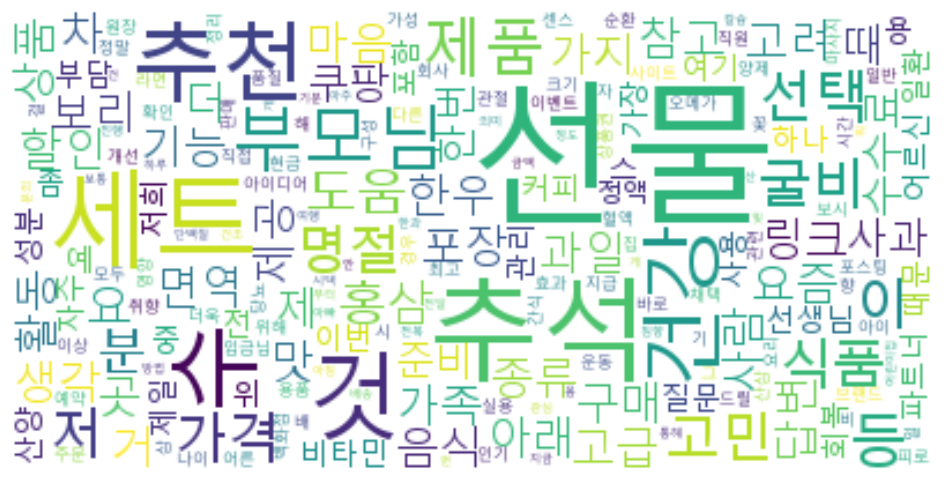

In [9]:
wc = WordCloud(
        background_color='white', random_state=2023,
        #font_path='C:/Users/human/AppData/Local/Microsoft/Windows/Fonts/NanumMyeongjo.ttf'
        font_path='C:/Windows/Fonts/malgun.ttf'
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

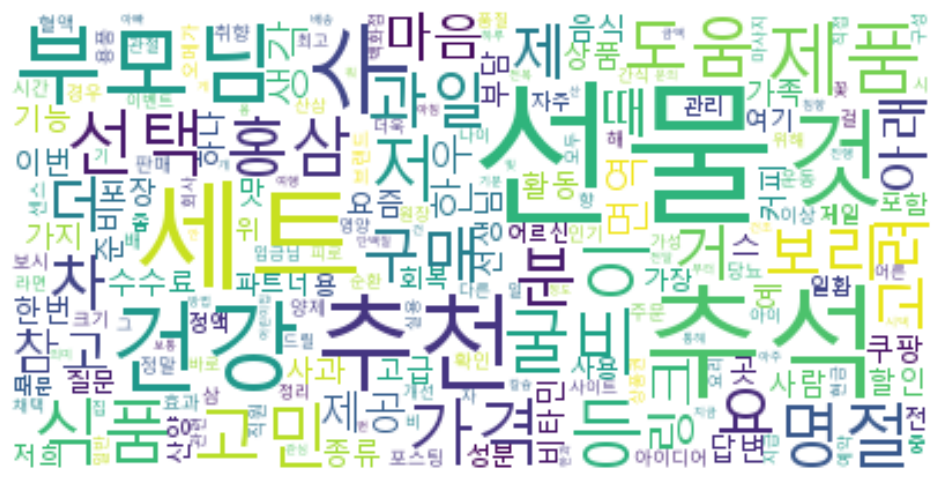

In [10]:
wc = WordCloud(
        background_color='white', random_state=2023,
        #font_path='C:/Users/human/AppData/Local/Microsoft/Windows/Fonts/NanumMyeongjo.ttf'
        font_path='C:/Windows/Fonts/malgun.ttf',
        relative_scaling=0.4
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

In [11]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

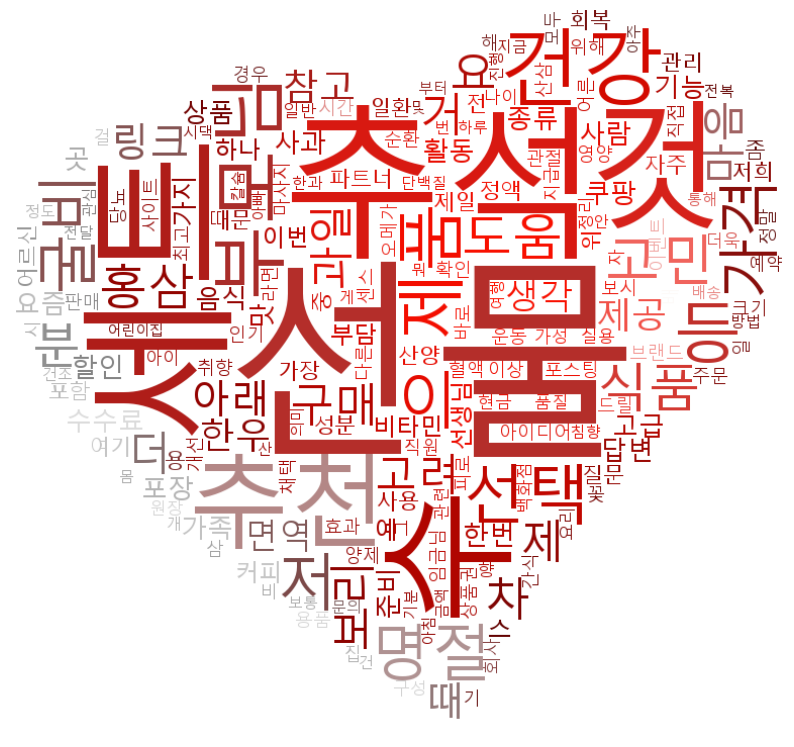

In [12]:
wc = WordCloud(
        background_color='white', random_state=2023,
        mask=mask, font_path='C:/Windows/Fonts/malgun.ttf',
        relative_scaling=0.4
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');